10000
Done!
T


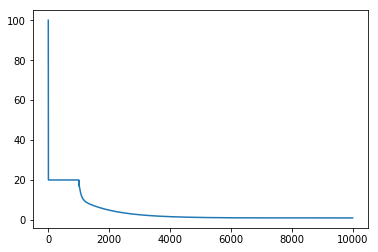

TX


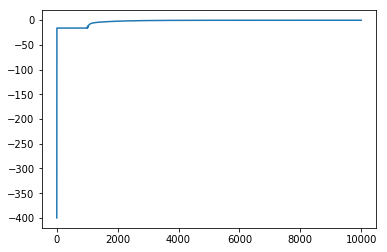

X


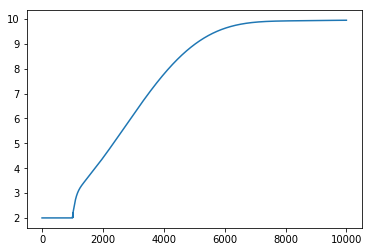

Mu0


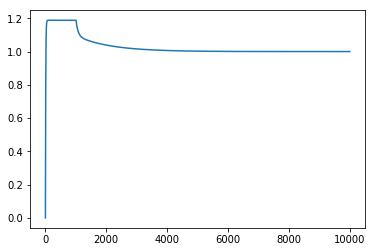

Mu1


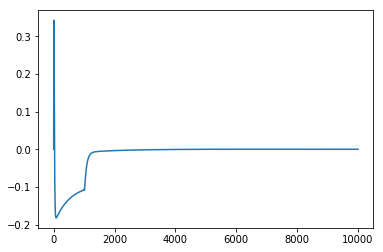

Mu2


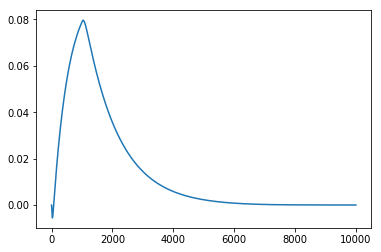

R0


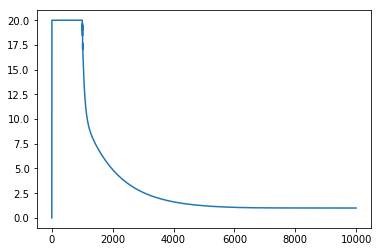

R1


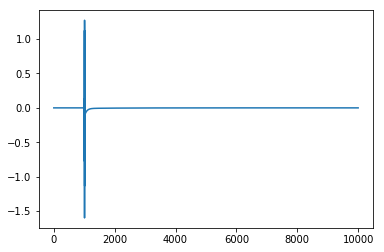

Ez0


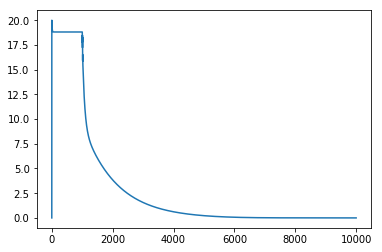

Ez1


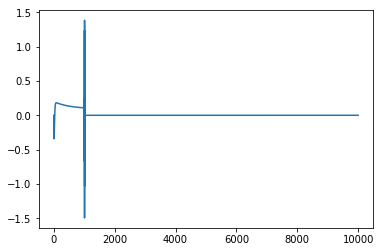

Ew0


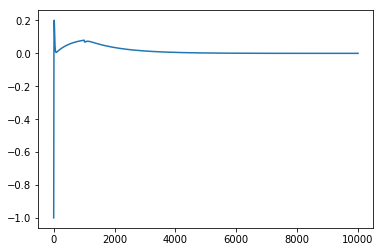

Ew1


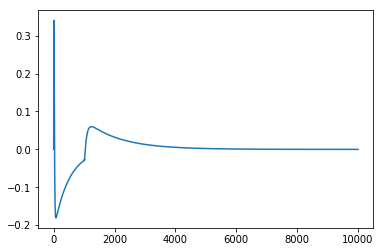

A


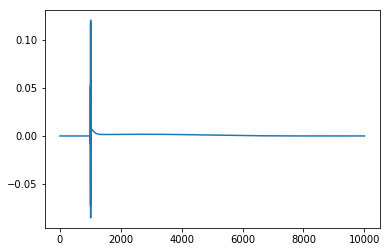

VFE


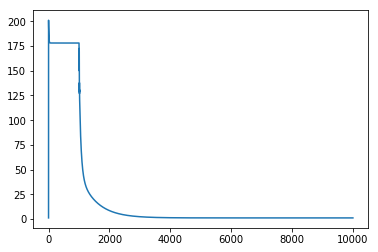

-0.19912670737256066
1.0016569401054811


In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# simulation parameters

simTime = 10000
dt = 1

time = range(int(simTime/dt))
N = len(time)
print(N)
action =True

# generative model parameters
desired_temp = 1
actionTime = simTime/ 4


# initialize sensors
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 1
varz1 = 1
#hidden state variances
varw0 = 0.01
varw1 = 1

T0 = 100 # temperature at x = 0

mu0 = [0]
mu1 = [0]
mu2 = [0]

# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.000000,N)


# innitialize action variable
a = [0]
#initialize generative process
xdot = [a[0]]
x = [2] # start arbitrarily 
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]


# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 

#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!

def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       


# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

# now actually run the simulations...
for i in range(1, N):
    xdot.append(a[i-1]) 
    x.append(x[i-1] + dt*(xdot[i]))
    T.append(T0/((x[i]**2)+1))
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    Tdot.append(Tx[i] * xdot[i])
    
    # calculate the sensory input!
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    # the generative model - i.e. the agent's brain!
    # these are the epsilons - i.e. the prediction errors!
    ez0.append(r0[i] - mu0[i-1]) # most basic error term
    ez1.append(r1[i]- mu1[i-1]) # these are the hierarchical errors
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)# these are the dynamical errors
    ew1.append(mu2[i-1] + mu1[i-1])
    
    # now calcualte the vfe
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    # now update the mean dynamical brain states... right?
    # through the graidnet descent update rules!
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    if time[i] > 1000:
        a.append(a[i-1] -(ka * Tx[i] * ez1[i]/varz1))
    else:
        a.append(0)
    
print("Done!")

print("T")
plt.plot(time, T)
plt.show()
print("TX")
plt.plot(time, Tx)
plt.show()
print("X")
plt.plot(time, x)
plt.show()
print("Mu0")
plt.plot(time, mu0)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("R0")
plt.plot(time, r0)
plt.show()
print("R1")
plt.plot(time, r1)
plt.show()
print("Ez0")
plt.plot(time, ez0)
plt.show()
print("Ez1")
plt.plot(time, ez1)
plt.show()
print("Ew0")
plt.plot(time, ew0)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("A")
plt.plot(time, a)
plt.show()
print("VFE")
plt.plot(time, vfe)
plt.show()
print(Tx[-1])
print(np.mean(T[9000:9900]))


In [2]:
print(mu1) # yah... all of these things are growing exponentially... I must be doing something wrong here?
# let's go back and double check over the equatinos, and check they are functional!

[0, 4.2142390583235245e-06, 1.2862385157981009e-05, 2.955281086679704e-05, 6.246372526179385e-05, 0.00012652307048438566, 0.0002551843088859371, 0.0005118438145619524, 0.00102483352124286, 0.002049759248707592, 0.004098057242526128, 0.00819430375673506, 0.016387030467933605, 0.032771546105737605, 0.06554002406300605, 0.13107627429987678, 0.2621486013917137, 0.5242938972058011, 1.0485837599716588, 2.0971623101406918, 4.194318717497503, 8.388632051024828, 16.777257183046714, 33.55450722691974, 67.10900716684105, 134.2180053242895, 268.43600202139635, 536.8719941816214, 1073.743978971248, 2147.487947522381, 4294.975884108959, 8589.951757674547, 17179.90350360859, 34359.80699475907, 68719.61397696985, 137439.22794063028, 274878.4558685409, 549756.9117236824, 1099513.823437634, 2199027.6468792176, 4398055.293870762, 8796110.586757466, 17592221.173489343, 35184442.34775162, 70368884.69653416, 140737769.3942318, 281475538.7898504, 562951077.5815259, 1125902155.165751, 2251804310.335946, 45036

In [3]:
print(r0)
print(r1)

[0, 20.954647479141777, 20.950161299236584, 20.345589263415267, 20.542616096123677, 20.650806519168764, 20.180379577941732, 20.67050567168558, 20.352497462844198, 20.607533696925312, 20.162060267930844, 20.206437625684835, 20.394696271605465, 20.579995242776146, 20.650051278863163, 20.972109159831867, 20.356170850323714, 20.6838699681194, 20.299443899034184, 20.25769568104864, 20.634599839809763, 20.58108823990826, 20.801422022015682, 20.75546942703779, 20.97782844909197, 20.888473197554617, 20.382063832703842, 20.112719824508485, 20.797480504287453, 20.81026859682891, 20.624057872690813, 20.45842790089507, 20.671146108565825, 20.76293180697603, 20.513995178969274, 20.410190006620674, 20.77768726364952, 21.68662864185995, 24.092573272137376, 28.04716304881442, 44.317645049777745, 93.2234140781163, 84.28685170447778, 5.480367188057943, 1.8029981459482571, 1.5896979309107524, 0.6357309109708773, 0.8460732606684094, 0.37266282701101994, 0.26993644539617767, 0.8752188461748742, 0.410791248

In [4]:
print(T)

print(x) 
print(a) 

[100.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000341860288298, 20.001370665956266, 20.003772511476726, 20.008924622217894, 20.019585083279594, 20.041287820748273, 20.085186010720047, 20.173913982420977, 20.354083558083467, 20.724518106993994, 21.507097631163628, 23.25938249424194, 27.72997921824924, 43.512952024755606, 92.52089657159992, 84.20363434481781, 5.240732925152354, 1.3567884684383442, 0.6170885440948733, 0.35362133712303395, 0.23008874671384424, 0.16235024508775828, 0.12126234112654698, 0.09455223899074508, 0.07633232296475567, 0.06351539747617534, 0.054398605021835834, 0.048060825403937316, 0.044143981910237, 0.042972081013843276, 0.04661201265757733, 0.06712210618211514, 0.8468421149956372, 3.0650553874066484e-05, 7.616945033562274e-06, 3.378579985253609e-06, 1.8985630117409185e-06, 1.2143561348730067e-06, 8.429678613801952e-07, 6.191476203572768e-07, 4.7

10000
Done!
T


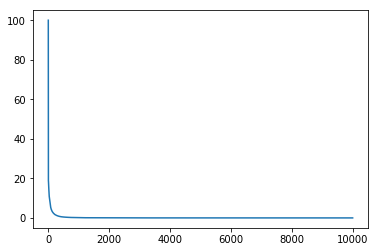

TX


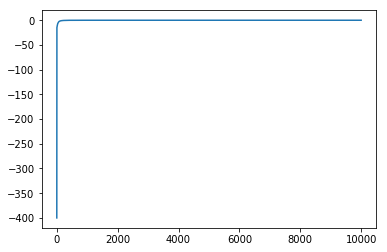

X


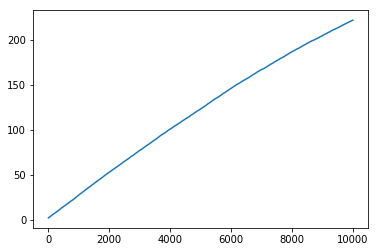

Mu0


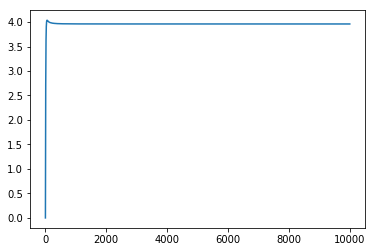

Mu1


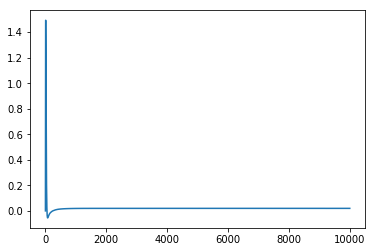

Mu2


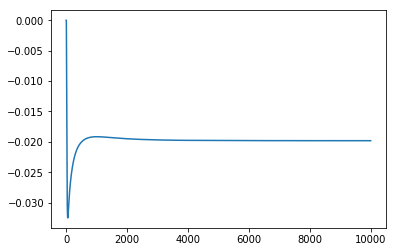

R0


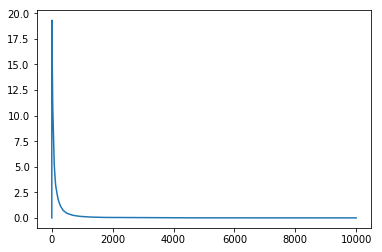

R1


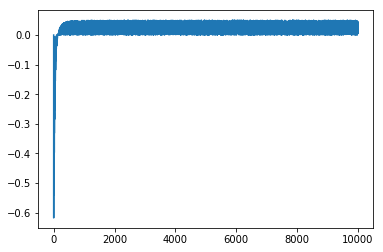

Ez0


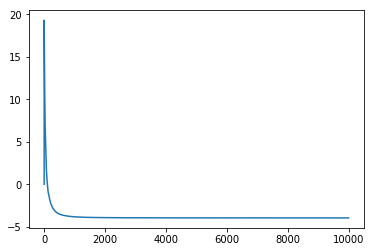

Ez1


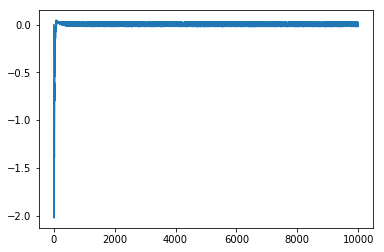

Ew0


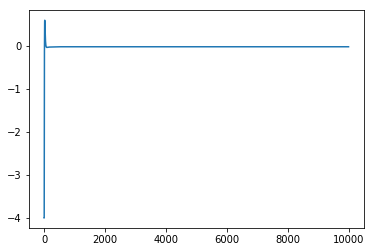

Ew1


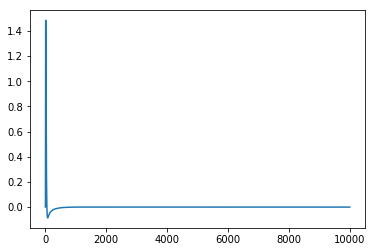

A


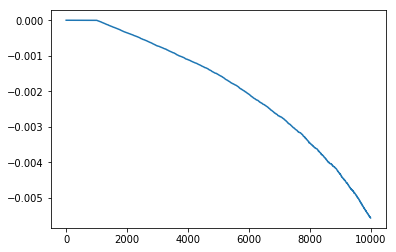

VFE


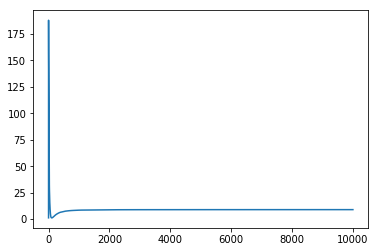

EA


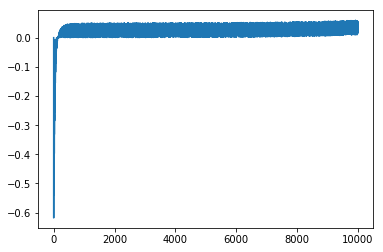

W_A


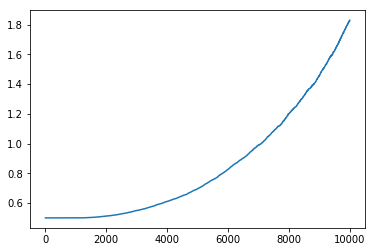

-1.8416934471585488e-05
0.002222974464850514
1.6173599361829416


In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

simTime = 10000
dt = 1

time = range(int(simTime/dt))
N = len(time)
print(N)
action =True

# generative model parameters
desired_temp = 4 #desired temperature
# time action onsets
actionTime = simTime/ 4


# initialize sensors
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 1
varz1 = 1
#hidden state variances
varw0 = 0.01
varw1 = 1

# params for generative process
T0 = 100 # temperature at x = 0

#initialize brain states
mu0 = [0]
mu1 = [0]
mu2 = [0]

# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.05,N)

theta_a = 1.6

# innitialize action variable
a = [0]
#initialize generative process
xdot = [theta_a * a[0]]
x = [2]
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]


# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 
 

#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!

w_a = [0.5] 
var_a = 0.1


ea = [r1[0] - (w_a[0] * a[0])] 

def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       


# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

for i in range(1, N):
    xdot.append((theta_a * a[i-1]) + zgp_1[i]) # this is the action
    x.append(x[i-1] + dt*(xdot[i]))
    T.append(T0/((x[i]**2)+1))
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    Tdot.append(Tx[i] * xdot[i])
    
    # calculate the sensory input!
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    ez0.append(r0[i] - mu0[i-1]) # most basic error term
    ez1.append(r1[i]- mu1[i-1]) # these are the hierarchical errors
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)# these are the dynamical errors
  
    ew1.append(mu2[i-1] + mu1[i-1])
    ea.append(r1[i] - (w_a[i-1] * a[i-1]))
    
    # now calcualte the vfe
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    if time[i] > 1000:
        a.append(a[i-1] -(ka * ez1[i]/varz1 * (1/var_a) * ea[i]) * mu1[i] * w_a[i-1])
       
        w_a.append(w_a[i-1] - (1000*(ez1[i]/varz1) * ((1/var_a)* ea[i]) * a[i] * mu1[i])) 
        

    else:
        a.append(0)
        w_a.append(w_a[i-1])
        
    
print("Done!")

print("T")
plt.plot(time, T)
plt.show()
print("TX")
plt.plot(time, Tx)
plt.show()
print("X")
plt.plot(time, x)
plt.show()
print("Mu0")
plt.plot(time, mu0)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("R0")
plt.plot(time, r0)
plt.show()
print("R1")
plt.plot(time, r1)
plt.show()
print("Ez0")
plt.plot(time, ez0)
plt.show()
print("Ez1")
plt.plot(time, ez1)
plt.show()
print("Ew0")
plt.plot(time, ew0)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("A")
plt.plot(time, a)
plt.show()
print("VFE")
plt.plot(time, vfe)
plt.show()
print("EA")
plt.plot(time, ea)
plt.show()
print("W_A")
plt.plot(time, w_a)
plt.show()
print(Tx[-1])
print(np.mean(T[9000:9900]))
print(np.mean(w_a[9000:9900]))

200
Done!
T


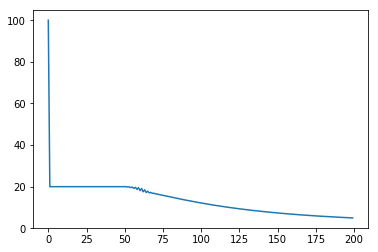

TX


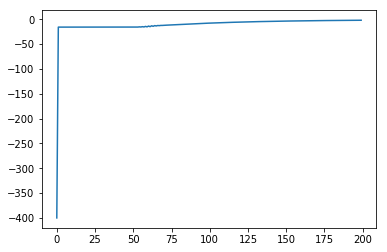

X


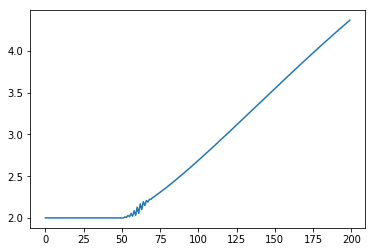

Mu0


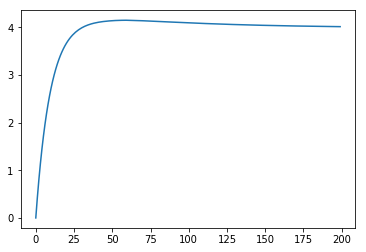

Mu1


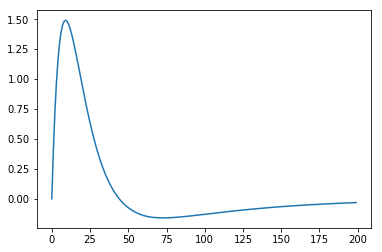

Mu2


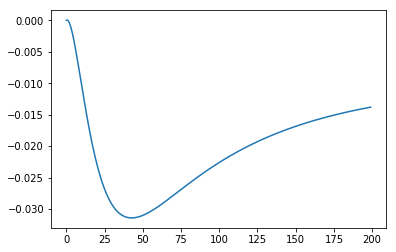

R0


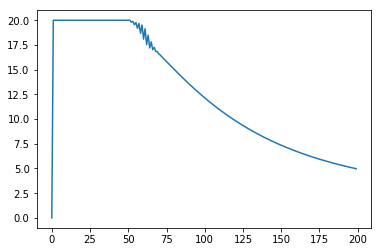

R1


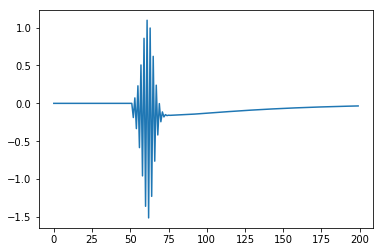

Ez0


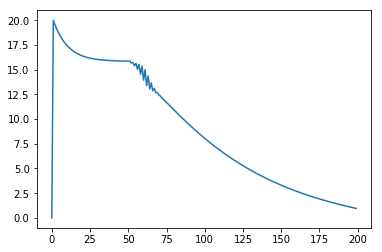

Ez1


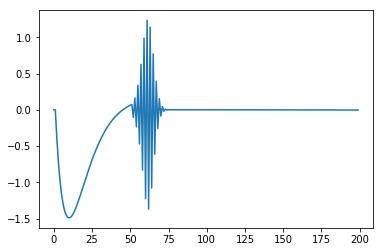

Ew0


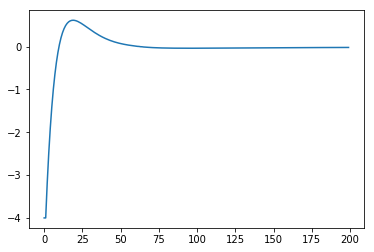

Ew1


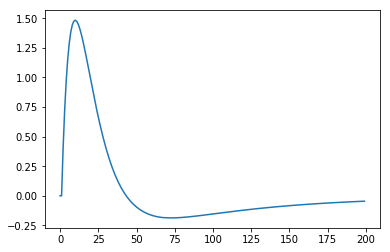

A


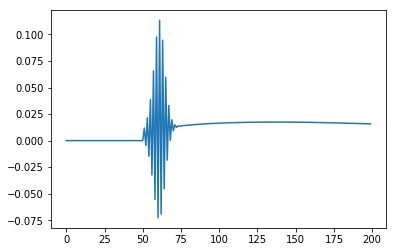

VFE


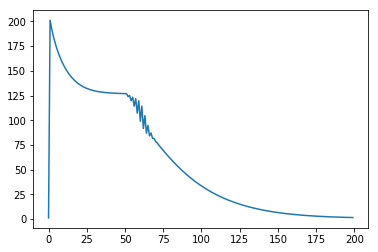

-2.1657847953186984
5.138737684377368


In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# simulation parameters

simTime = 200
dt = 1

time = range(int(simTime/dt))
N = len(time)
print(N)
action =True

# generative model parameters
desired_temp = 4 #desired temperature
# time action onsets
actionTime = simTime/ 4


# initialize sensors
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 1
varz1 = 1
#hidden state variances
varw0 = 0.01
varw1 = 1

# params for generative process
T0 = 100 # temperature at x = 0

#initialize brain states
mu0 = [0]
mu1 = [0]
mu2 = [0]

# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.000000,N)


# innitialize action variable
a = [0]
#initialize generative process
xdot = [a[0]]
x = [2] 
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]


# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 

#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!

def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       


# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

for i in range(1, N):
    xdot.append(a[i-1]) 
    x.append(x[i-1] + dt*(xdot[i]))
    T.append(T0/((x[i]**2)+1))
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    Tdot.append(Tx[i] * xdot[i])
    
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    ez0.append(r0[i] - mu0[i-1]) 
    ez1.append(r1[i]- mu1[i-1])
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)
    ew1.append(mu2[i-1] + mu1[i-1])
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    if time[i] > 50:
        a.append(a[i-1] -(ka * Tx[i] * ez1[i]/varz1)) 
    else:
        a.append(0)
    
print("Done!")

print("T")
plt.plot(time, T)
plt.show()
print("TX")
plt.plot(time, Tx)
plt.show()
print("X")
plt.plot(time, x)
plt.show()
print("Mu0")
plt.plot(time, mu0)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("R0")
plt.plot(time, r0)
plt.show()
print("R1")
plt.plot(time, r1)
plt.show()
print("Ez0")
plt.plot(time, ez0)
plt.show()
print("Ez1")
plt.plot(time, ez1)
plt.show()
print("Ew0")
plt.plot(time, ew0)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("A")
plt.plot(time, a)
plt.show()
print("VFE")
plt.plot(time, vfe)
plt.show()
print(Tx[-1])
print(np.mean(T[simTime-10:simTime]))